NPem OD推定の結果を図化

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 

/Users/takahiromatsunaga/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/takahiromatsunaga/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


まずは10-1013（最も手間が多い）

In [2]:
hour_lists = ['08', '10', '12', '14', '16', '18', '20']

list08 = [
    0.04142731, 0.07869702, 0.05174954, 0.05726891, 0.04794587,
    0.04279367, 0.04255319, 0.05637842, 0.05914881, 0.01,
    0.04250802, 0.08713783, 0.05455897, 0.06142193, 0.05005752,
    0.04402572, 0.043742, 0.06053532, 0.0638389, 0.01
]
list08_joint = [(list08[i]+list08[i+10]) for i in range(10)]
print(list08_joint)

[0.08393533, 0.16583485, 0.10630851, 0.11869083999999999, 0.09800339, 0.08681939, 0.08629519, 0.11691373999999999, 0.12298771, 0.02]


In [3]:
list10 = [0.04186114, 0.07765463, 0.05179178, 0.05706342, 0.04812975, 0.04316607, 0.04293878, 0.05619508, 0.05885316, 0.01, 0.04284583, 0.08633825, 0.05460647, 0.06124915, 0.05021244, 0.04431864, 0.04404948, 0.06036553, 0.06358339, 0.01]
list12 = [0.04218346, 0.07565665, 0.05137406, 0.05639444, 0.04794831, 0.04334254, 0.04312765, 0.05560757, 0.05809189, 0.01, 0.04412716, 0.08471843, 0.05496286, 0.06131856, 0.05085452, 0.0453916, 0.04513906, 0.06055315, 0.06355193, 0.01]
list14 = [0.04239987, 0.07595451, 0.05105845, 0.0568757, 0.04762034, 0.04322173, 0.0429563, 0.05642593, 0.05891147, 0.01, 0.04395177, 0.08461511, 0.05412886, 0.06144964, 0.05001624, 0.04481406, 0.04449766, 0.06111964, 0.06412398, 0.01]
list16 = [0.041776, 0.07586317, 0.05097186, 0.05632515, 0.04748561, 0.04286235, 0.04262575, 0.05563098, 0.05816034, 0.01, 0.04404223, 0.08569191, 0.0549327, 0.06177946, 0.05072481, 0.04521108, 0.04492829, 0.06115238, 0.06422992, 0.01]
list18 = [0.03008806, 0.05197809, 0.03967106, 0.04808681, 0.03500388, 0.03046799, 0.03017236, 0.04641616, 0.05037309, 0.01110681, 0.04357311, 0.11963963, 0.06814068, 0.077505, 0.05722839, 0.04447832, 0.04309495, 0.07848986, 0.08321184, 0.01103872]
list20 = [0.04109673, 0.07560532, 0.0506527, 0.05572212, 0.04712852, 0.04234964, 0.0421435, 0.05487456, 0.057437, 0.01, 0.04437832, 0.08672811, 0.05573753, 0.06232585, 0.05145598, 0.04573409, 0.04548758, 0.06151876, 0.06464449, 0.01]



In [4]:
# リストのリストを作成
lists = {
    "list08": [0.04142731, 0.07869702, 0.05174954, 0.05726891, 0.04794587,
               0.04279367, 0.04255319, 0.05637842, 0.05914881, 0.01,
               0.04250802, 0.08713783, 0.05455897, 0.06142193, 0.05005752,
               0.04402572, 0.043742, 0.06053532, 0.0638389, 0.01],
    "list10": [0.04186114, 0.07765463, 0.05179178, 0.05706342, 0.04812975,
               0.04316607, 0.04293878, 0.05619508, 0.05885316, 0.01,
               0.04284583, 0.08633825, 0.05460647, 0.06124915, 0.05021244,
               0.04431864, 0.04404948, 0.06036553, 0.06358339, 0.01],
    "list12": [0.04218346, 0.07565665, 0.05137406, 0.05639444, 0.04794831,
               0.04334254, 0.04312765, 0.05560757, 0.05809189, 0.01,
               0.04412716, 0.08471843, 0.05496286, 0.06131856, 0.05085452,
               0.0453916, 0.04513906, 0.06055315, 0.06355193, 0.01],
    "list14": [0.04239987, 0.07595451, 0.05105845, 0.0568757, 0.04762034,
               0.04322173, 0.0429563, 0.05642593, 0.05891147, 0.01,
               0.04395177, 0.08461511, 0.05412886, 0.06144964, 0.05001624,
               0.04481406, 0.04449766, 0.06111964, 0.06412398, 0.01],
    "list16": [0.041776, 0.07586317, 0.05097186, 0.05632515, 0.04748561,
               0.04286235, 0.04262575, 0.05563098, 0.05816034, 0.01,
               0.04404223, 0.08569191, 0.0549327, 0.06177946, 0.05072481,
               0.04521108, 0.04492829, 0.06115238, 0.06422992, 0.01],
    "list18": [0.03008806, 0.05197809, 0.03967106, 0.04808681, 0.03500388,
               0.03046799, 0.03017236, 0.04641616, 0.05037309, 0.01110681,
               0.04357311, 0.11963963, 0.06814068, 0.077505, 0.05722839,
               0.04447832, 0.04309495, 0.07848986, 0.08321184, 0.01103872],
    "list20": [0.04109673, 0.07560532, 0.0506527, 0.05572212, 0.04712852,
               0.04234964, 0.0421435, 0.05487456, 0.057437, 0.01,
               0.04437832, 0.08672811, 0.05573753, 0.06232585, 0.05145598,
               0.04573409, 0.04548758, 0.06151876, 0.06464449, 0.01]
}

# 処理を実行
joint_dict_lists = {}
for name, lst in list(lists.items()):
    # 各リストに対して、新しい joint リストを作成
    joint_list = [(lst[i] + lst[i+10]) for i in range(10)]
    # 新しいリストを保存
    lists[f"{name}_joint"] = joint_list
    joint_dict_lists[f"{name}_joint"] = joint_list


# 結果を表示
for name, joint_list in lists.items():
    if '_joint' in name:
        print(f"{name}: {joint_list}")

print(joint_dict_lists)

list08_joint: [0.08393533, 0.16583485, 0.10630851, 0.11869083999999999, 0.09800339, 0.08681939, 0.08629519, 0.11691373999999999, 0.12298771, 0.02]
list10_joint: [0.08470696999999999, 0.16399288, 0.10639825, 0.11831257, 0.09834219, 0.08748471, 0.08698826000000001, 0.11656061000000001, 0.12243655, 0.02]
list12_joint: [0.08631062, 0.16037508, 0.10633692, 0.117713, 0.09880283000000001, 0.08873413999999999, 0.08826671, 0.11616072, 0.12164382000000001, 0.02]
list14_joint: [0.08635164000000001, 0.16056962, 0.10518731, 0.11832534, 0.09763658, 0.08803579, 0.08745396, 0.11754557, 0.12303544999999999, 0.02]
list16_joint: [0.08581823, 0.16155508, 0.10590456000000001, 0.11810461, 0.09821041999999999, 0.08807343000000001, 0.08755404, 0.11678336, 0.12239026, 0.02]
list18_joint: [0.07366117, 0.17161772, 0.10781173999999999, 0.12559181, 0.09223227, 0.07494631, 0.07326731, 0.12490601999999999, 0.13358493, 0.02214553]
list20_joint: [0.08547505, 0.16233343, 0.10639023, 0.11804797, 0.09858449999999999, 0.0

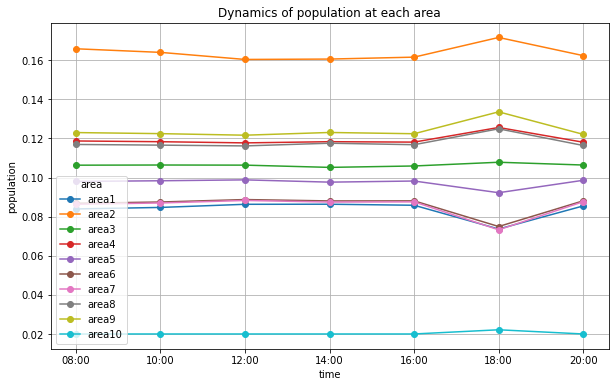

In [5]:
import matplotlib.pyplot as plt

# 各リストのデータ
data = {
    "08:00": [0.08393533, 0.16583485, 0.10630851, 0.11869083999999999, 0.09800339, 0.08681939, 0.08629519, 0.11691373999999999, 0.12298771, 0.02],
    "10:00": [0.08470696999999999, 0.16399288, 0.10639825, 0.11831257, 0.09834219, 0.08748471, 0.08698826000000001, 0.11656061000000001, 0.12243655, 0.02],
    "12:00": [0.08631062, 0.16037508, 0.10633692, 0.117713, 0.09880283000000001, 0.08873413999999999, 0.08826671, 0.11616072, 0.12164382000000001, 0.02],
    "14:00": [0.08635164000000001, 0.16056962, 0.10518731, 0.11832534, 0.09763658, 0.08803579, 0.08745396, 0.11754557, 0.12303544999999999, 0.02],
    "16:00": [0.08581823, 0.16155508, 0.10590456000000001, 0.11810461, 0.09821041999999999, 0.08807343000000001, 0.08755404, 0.11678336, 0.12239026, 0.02],
    "18:00": [0.07366117, 0.17161772, 0.10781173999999999, 0.12559181, 0.09223227, 0.07494631, 0.07326731, 0.12490601999999999, 0.13358493, 0.02214553],
    "20:00": [0.08547505, 0.16233343, 0.10639023, 0.11804797, 0.09858449999999999, 0.08808373, 0.08763108, 0.11639332, 0.12208149, 0.02]
}

# 各地点の滞在人口の時間変化をプロット
num_points = len(next(iter(data.values())))  # データポイントの数

plt.figure(figsize=(10, 6))

for i in range(num_points):
    population_trend = [data[time][i] for time in data]
    plt.plot(data.keys(), population_trend, marker='o', label=f'area{i+1}')

plt.xlabel('time')
plt.ylabel('population')
plt.title('Dynamics of population at each area')
plt.legend(title='area')
plt.grid(True)
plt.show()


目的地をグルーピング

{'08:00': [0.26977018, 0.2043119, 0.35859229, 0.17311458], '10:00': [0.26869985, 0.20474044, 0.35730973, 0.17447297], '12:00': [0.2666857, 0.20513975, 0.35551754, 0.17700085], '14:00': [0.26692126, 0.20282389, 0.35890636, 0.17548975], '16:00': [0.26737331, 0.20411498, 0.35727823000000003, 0.17562747], '18:00': [0.26742442, 0.20004401, 0.38408275999999997, 0.14821362], '20:00': [0.26780848, 0.20497473, 0.35652278, 0.17571481]}


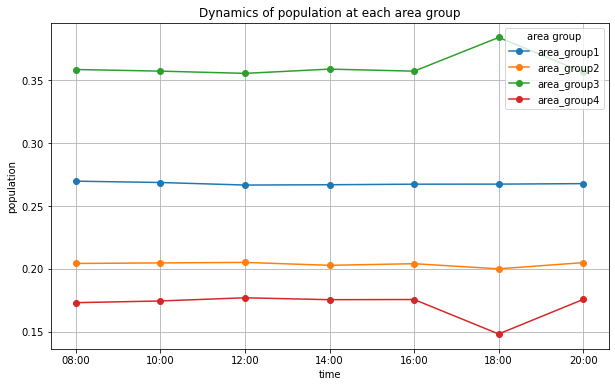

In [6]:
import matplotlib.pyplot as plt

# 各リストのデータ
data = {
    "08:00": [0.08393533, 0.16583485, 0.10630851, 0.11869083999999999, 0.09800339, 0.08681939, 0.08629519, 0.11691373999999999, 0.12298771, 0.02],
    "10:00": [0.08470696999999999, 0.16399288, 0.10639825, 0.11831257, 0.09834219, 0.08748471, 0.08698826000000001, 0.11656061000000001, 0.12243655, 0.02],
    "12:00": [0.08631062, 0.16037508, 0.10633692, 0.117713, 0.09880283000000001, 0.08873413999999999, 0.08826671, 0.11616072, 0.12164382000000001, 0.02],
    "14:00": [0.08635164000000001, 0.16056962, 0.10518731, 0.11832534, 0.09763658, 0.08803579, 0.08745396, 0.11754557, 0.12303544999999999, 0.02],
    "16:00": [0.08581823, 0.16155508, 0.10590456000000001, 0.11810461, 0.09821041999999999, 0.08807343000000001, 0.08755404, 0.11678336, 0.12239026, 0.02],
    "18:00": [0.07366117, 0.17161772, 0.10781173999999999, 0.12559181, 0.09223227, 0.07494631, 0.07326731, 0.12490601999999999, 0.13358493, 0.02214553],
    "20:00": [0.08547505, 0.16233343, 0.10639023, 0.11804797, 0.09858449999999999, 0.08808373, 0.08763108, 0.11639332, 0.12208149, 0.02]
}

# 各地点を指定された方法でまとめる
aggregated_data = {}
for time, values in data.items():
    aggregated_values = [
        values[0] + values[1] + values[9],  # i=0, 1, 9の合計
        values[2] + values[4],              # i=2, 4の合計
        values[3] + values[7] + values[8],  # i=3, 7, 8の合計
        values[5] + values[6]                           # i=6はそのまま
    ]
    aggregated_data[time] = aggregated_values

print(aggregated_data)

# 各地点の滞在人口の時間変化をプロット
plt.figure(figsize=(10, 6))

for i in range(len(aggregated_data["08:00"])):
    population_trend = [aggregated_data[time][i] for time in aggregated_data]
    plt.plot(aggregated_data.keys(), population_trend, marker='o', label=f'area_group{i+1}')

plt.xlabel('time')
plt.ylabel('population')
plt.title('Dynamics of population at each area group')
plt.legend(title='area group')
plt.grid(True)
plt.show()


In [7]:
# カメラの捉えた総人数をかけてみるか
basepath = '/Users/takahiromatsunaga/res2023/bledata/ble_timegroup' # /20230130_18/20230130_1830_flow.csv'
for hour in hour_lists:
    df_camera = pd.read_csv(os.path.join(basepath, f'20230130_{hour}/20230130_{hour}30_flow.csv'))
    total_flow = np.sum(df_camera.values)
    print(hour, total_flow)
    

08 4494.25
10 3608.0
12 4031.5
14 4022.5
16 4990.75
18 6022.5
20 4719.755


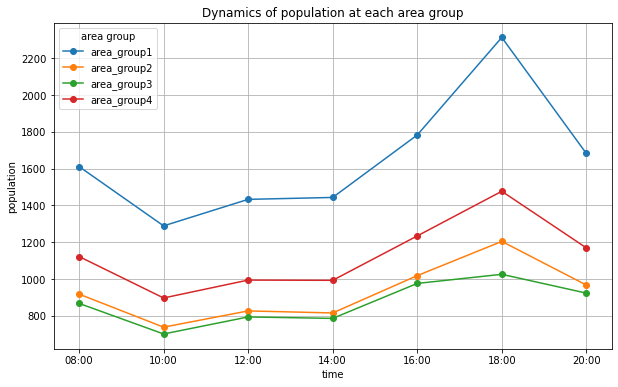

In [9]:
import matplotlib.pyplot as plt

# 各時刻の滞在総人口
total_population = {
    "08:00": 4494.25,
    "10:00": 3608.0,
    "12:00": 4031.5,
    "14:00": 4022.5,
    "16:00": 4990.75,
    "18:00": 6022.5,
    "20:00": 4719.755
}

# 各リストのデータ（比率）
data = {
    "08:00": [0.08393533, 0.16583485, 0.10630851, 0.11869083999999999, 0.09800339, 0.08681939, 0.08629519, 0.11691373999999999, 0.12298771, 0.02],
    "10:00": [0.08470696999999999, 0.16399288, 0.10639825, 0.11831257, 0.09834219, 0.08748471, 0.08698826000000001, 0.11656061000000001, 0.12243655, 0.02],
    "12:00": [0.08631062, 0.16037508, 0.10633692, 0.117713, 0.09880283000000001, 0.08873413999999999, 0.08826671, 0.11616072, 0.12164382000000001, 0.02],
    "14:00": [0.08635164000000001, 0.16056962, 0.10518731, 0.11832534, 0.09763658, 0.08803579, 0.08745396, 0.11754557, 0.12303544999999999, 0.02],
    "16:00": [0.08581823, 0.16155508, 0.10590456000000001, 0.11810461, 0.09821041999999999, 0.08807343000000001, 0.08755404, 0.11678336, 0.12239026, 0.02],
    "18:00": [0.07366117, 0.17161772, 0.10781173999999999, 0.12559181, 0.09223227, 0.07494631, 0.07326731, 0.12490601999999999, 0.13358493, 0.02214553],
    "20:00": [0.08547505, 0.16233343, 0.10639023, 0.11804797, 0.09858449999999999, 0.08808373, 0.08763108, 0.11639332, 0.12208149, 0.02]
}

# 各地点を指定された方法でまとめて滞在人数を計算
aggregated_population = {}
for time, values in data.items():
    total_pop = total_population[time]
    aggregated_values = [
        total_pop * (values[3] + values[7] + values[8]), # A1
        total_pop * (values[2] + values[4]),   # A2            # i=2, 4の合計
        total_pop * (values[5] + values[6] + values[9]), # A3  # i=3, 7, 8の合計
        total_pop * (values[0] + values[1])   #   A4 ,                            # i=5はそのまま
       #total_pop * values[6]                             # i=6はそのまま
    ]
    aggregated_population[time] = aggregated_values

# 各地点の滞在人口の時間変化をプロット
plt.figure(figsize=(10, 6))

for i in range(len(aggregated_population["08:00"])):
    population_trend = [aggregated_population[time][i] for time in aggregated_population]
    plt.plot(aggregated_population.keys(), population_trend, marker='o', label=f'area_group{i+1}')

plt.xlabel('time')
plt.ylabel('population')
plt.title('Dynamics of population at each area group')
plt.legend(title='area group')
plt.grid(True)
plt.show()


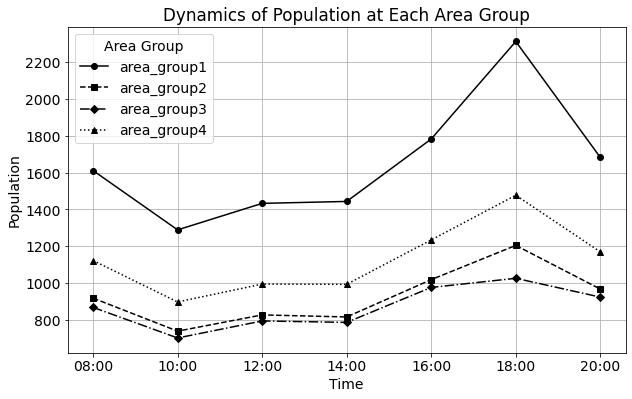

In [11]:
import matplotlib.pyplot as plt

# Data for total population at different times
total_population = {
    "08:00": 4494.25,
    "10:00": 3608.0,
    "12:00": 4031.5,
    "14:00": 4022.5,
    "16:00": 4990.75,
    "18:00": 6022.5,
    "20:00": 4719.755
}

# Data for ratios at different times
data = {
    "08:00": [0.08393533, 0.16583485, 0.10630851, 0.11869083999999999, 0.09800339, 0.08681939, 0.08629519, 0.11691373999999999, 0.12298771, 0.02],
    "10:00": [0.08470696999999999, 0.16399288, 0.10639825, 0.11831257, 0.09834219, 0.08748471, 0.08698826000000001, 0.11656061000000001, 0.12243655, 0.02],
    "12:00": [0.08631062, 0.16037508, 0.10633692, 0.117713, 0.09880283000000001, 0.08873413999999999, 0.08826671, 0.11616072, 0.12164382000000001, 0.02],
    "14:00": [0.08635164000000001, 0.16056962, 0.10518731, 0.11832534, 0.09763658, 0.08803579, 0.08745396, 0.11754557, 0.12303544999999999, 0.02],
    "16:00": [0.08581823, 0.16155508, 0.10590456000000001, 0.11810461, 0.09821041999999999, 0.08807343000000001, 0.08755404, 0.11678336, 0.12239026, 0.02],
    "18:00": [0.07366117, 0.17161772, 0.10781173999999999, 0.12559181, 0.09223227, 0.07494631, 0.07326731, 0.12490601999999999, 0.13358493, 0.02214553],
    "20:00": [0.08547505, 0.16233343, 0.10639023, 0.11804797, 0.09858449999999999, 0.08808373, 0.08763108, 0.11639332, 0.12208149, 0.02]
}

# Aggregating population data
aggregated_population = {}
for time, values in data.items():
    total_pop = total_population[time]
    aggregated_values = [
        total_pop * (values[3] + values[7] + values[8]), # A1
        total_pop * (values[2] + values[4]),   # A2            # i=2, 4の合計
        total_pop * (values[5] + values[6] + values[9]), # A3  # i=3, 7, 8の合計
        total_pop * (values[0] + values[1])   #   A4 ,                                     # Sum of indices 5, 6
    ]
    aggregated_population[time] = aggregated_values

# Plotting the population dynamics with monochrome style and distinguishing by line styles and markers
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 14})

# Assigning markers and line styles
markers = ['o', 's', 'D', '^']
linestyles = ['-', '--', '-.', ':']

# Plotting each group with distinct styles
for i in range(len(aggregated_population["08:00"])):
    population_trend = [aggregated_population[time][i] for time in aggregated_population]
    plt.plot(aggregated_population.keys(), population_trend, marker=markers[i], linestyle=linestyles[i], label=f'area_group{i+1}', color='black')

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Dynamics of Population at Each Area Group')
plt.legend(title='Area Group')
plt.grid(True)
plt.show()


続いて5-1013を見てみる．目的地を縮約した場合

In [12]:
lists_5 = {
    'list08_5' : [0.08636882, 0.07990472, 0.06358209, 0.06145638, 0.08816931, 0.05571743, 0.14408814, 0.1195023, 0.07443826, 0.05900811, 0.10782699, 0.05993695],
    'list10_5' : [0.0877286, 0.08238002, 0.06627705, 0.06325813, 0.0812081, 0.05483058, 0.13892545, 0.12223278, 0.07733693, 0.06134419, 0.10542663, 0.05905075],
    'list12_5' : [0.08546602, 0.08031878, 0.06548435, 0.06275743, 0.07875379, 0.05418588, 0.1366892, 0.12245742, 0.08186367, 0.06482924, 0.10655142, 0.06064262],
    'list14_5' : [0.08756294, 0.08170556, 0.06602895, 0.06308643, 0.08176523, 0.05503034, 0.13650057, 0.11903019, 0.07792628, 0.06400326, 0.10693695, 0.0604226],
    'list16_5' : [0.08306104, 0.07776356, 0.06323521, 0.06079772, 0.07756351, 0.05273829, 0.14138681, 0.12538768, 0.08250359, 0.06521841, 0.109373, 0.0609709],
    'list18_5' : [0.08473697, 0.07886966, 0.06300789, 0.06047494, 0.07726401, 0.05282831, 0.14028902, 0.12128102, 0.08037177, 0.06734816, 0.10967112, 0.06385665],
    'list20_5' : [0.07915942, 0.07465864, 0.05977557, 0.05771842, 0.07064126, 0.05005272, 0.1472558, 0.13200547, 0.08755147, 0.06863122, 0.10868275, 0.06386685]
}

In [13]:
# 処理を実行
joint_dict_lists_5 = {}
for name, lst in list(lists_5.items()):
    # 各リストに対して、新しい joint リストを作成
    joint_list = [(lst[i] + lst[i+6]) for i in range(6)]
    # 新しいリストを保存
    lists_5[f"{name}_joint"] = joint_list
    joint_dict_lists_5[f"{name}_joint"] = joint_list


# 結果を表示
for name, joint_list in lists_5.items():
    if '_joint' in name:
        print(f"{name}: {joint_list}")

print(joint_dict_lists_5)

list08_5_joint: [0.23045696, 0.19940702, 0.13802035, 0.12046449000000001, 0.1959963, 0.11565438]
list10_5_joint: [0.22665405, 0.20461279999999998, 0.14361398, 0.12460231999999999, 0.18663473, 0.11388133]
list12_5_joint: [0.22215522000000001, 0.20277620000000002, 0.14734802, 0.12758667, 0.18530521, 0.1148285]
list14_5_joint: [0.22406351, 0.20073575, 0.14395523, 0.12708969, 0.18870218, 0.11545294]
list16_5_joint: [0.22444785, 0.20315124, 0.1457388, 0.12601613, 0.18693651, 0.11370919]
list18_5_joint: [0.22502598999999998, 0.20015068, 0.14337966, 0.1278231, 0.18693513, 0.11668496]
list20_5_joint: [0.22641521999999997, 0.20666411, 0.14732704000000002, 0.12634964, 0.17932400999999998, 0.11391957]
{'list08_5_joint': [0.23045696, 0.19940702, 0.13802035, 0.12046449000000001, 0.1959963, 0.11565438], 'list10_5_joint': [0.22665405, 0.20461279999999998, 0.14361398, 0.12460231999999999, 0.18663473, 0.11388133], 'list12_5_joint': [0.22215522000000001, 0.20277620000000002, 0.14734802, 0.12758667, 0.18

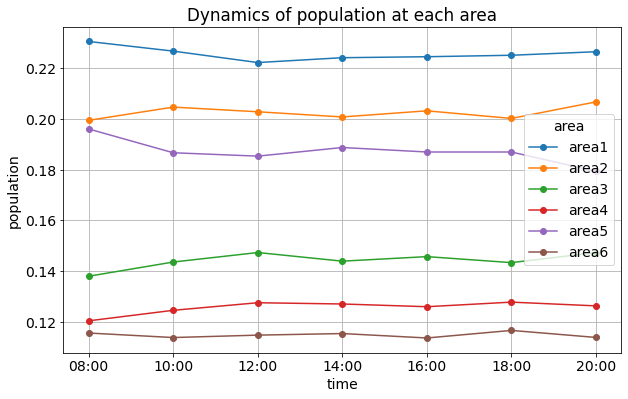

In [14]:
import matplotlib.pyplot as plt

# 各リストのデータ
data = {
    "08:00": [0.23045696, 0.19940702, 0.13802035, 0.12046449000000001, 0.1959963, 0.11565438],
    "10:00": [0.22665405, 0.20461279999999998, 0.14361398, 0.12460231999999999, 0.18663473, 0.11388133],
    "12:00": [0.22215522000000001, 0.20277620000000002, 0.14734802, 0.12758667, 0.18530521, 0.1148285],
    "14:00": [0.22406351, 0.20073575, 0.14395523, 0.12708969, 0.18870218, 0.11545294],
    "16:00": [0.22444785, 0.20315124, 0.1457388, 0.12601613, 0.18693651, 0.11370919],
    "18:00": [0.22502598999999998, 0.20015068, 0.14337966, 0.1278231, 0.18693513, 0.11668496],
    "20:00": [0.22641521999999997, 0.20666411, 0.14732704000000002, 0.12634964, 0.17932400999999998, 0.11391957]
}

# 各地点の滞在人口の時間変化をプロット
num_points = len(next(iter(data.values())))  # データポイントの数

plt.figure(figsize=(10, 6))

for i in range(num_points):
    population_trend = [data[time][i] for time in data]
    plt.plot(data.keys(), population_trend, marker='o', label=f'area{i+1}')

plt.xlabel('time')
plt.ylabel('population')
plt.title('Dynamics of population at each area')
plt.legend(title='area')
plt.grid(True)
plt.show()


{'08:00': [0.23045696, 0.19940702, 0.13802035, 0.12046449000000001, 0.1959963, 0.11565438], '10:00': [0.22665405, 0.20461279999999998, 0.14361398, 0.12460231999999999, 0.18663473, 0.11388133], '12:00': [0.22215522000000001, 0.20277620000000002, 0.14734802, 0.12758667, 0.18530521, 0.1148285], '14:00': [0.22406351, 0.20073575, 0.14395523, 0.12708969, 0.18870218, 0.11545294], '16:00': [0.22444785, 0.20315124, 0.1457388, 0.12601613, 0.18693651, 0.11370919], '18:00': [0.22502598999999998, 0.20015068, 0.14337966, 0.1278231, 0.18693513, 0.11668496], '20:00': [0.22641521999999997, 0.20666411, 0.14732704000000002, 0.12634964, 0.17932400999999998, 0.11391957]}


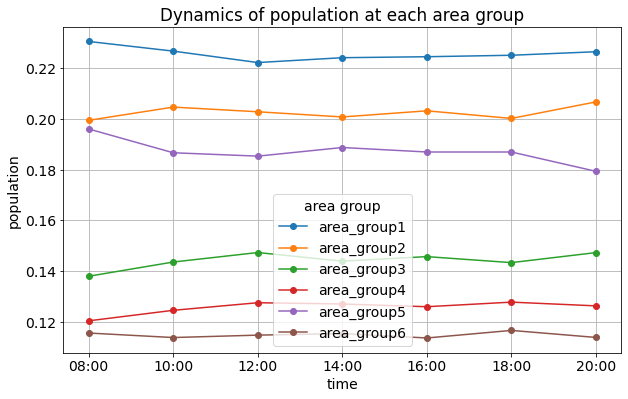

In [15]:


# 各地点を指定された方法でまとめる
aggregated_data = {}
for time, values in data.items():
    aggregated_values = [
        values[0], # + values[9],  # i=0, 1, 9の合計
        values[1], # + values[4],              # i=2, 4の合計
        values[2], # + values[7] + values[8],  # i=3, 7, 8の合計
        values[3],                          # i=5はそのまま
        values[4],                           # i=6はそのまま
        values[5]
    ]
    aggregated_data[time] = aggregated_values

print(aggregated_data)

# 各地点の滞在人口の時間変化をプロット
plt.figure(figsize=(10, 6))

for i in range(len(aggregated_data["08:00"])):
    population_trend = [aggregated_data[time][i] for time in aggregated_data]
    plt.plot(aggregated_data.keys(), population_trend, marker='o', label=f'area_group{i+1}')

plt.xlabel('time')
plt.ylabel('population')
plt.title('Dynamics of population at each area group')
plt.legend(title='area group')
plt.grid(True)
plt.show()


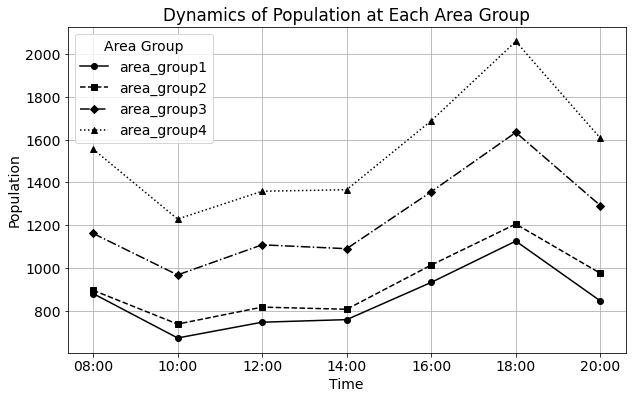

In [18]:
# 各時刻の滞在総人口
total_population = {
    "08:00": 4494.25,
    "10:00": 3608.0,
    "12:00": 4031.5,
    "14:00": 4022.5,
    "16:00": 4990.75,
    "18:00": 6022.5,
    "20:00": 4719.755
}

# 各地点を指定された方法でまとめて滞在人数を計算
# aggregated_population = {}
# for time, values in data.items():
#     total_pop = total_population[time]
#     aggregated_values = [
#         total_pop * values[4], #        A1                   # i=5はそのまま
#         total_pop * values[1], #        A2                  # i=5はそのまま
#         total_pop * (values[2] + values[3]), # A3 + values[7] + values[8]),  # i=3, 7, 8の合計
#         total_pop * (values[0] + values[5]) # A4
#         #total_pop * values[5]                             # i=6はそのまま
#     ]
#     aggregated_population[time] = aggregated_values

# # 各地点の滞在人口の時間変化をプロット
# plt.figure(figsize=(10, 6))

# for i in range(len(aggregated_population["08:00"])):
#     population_trend = [aggregated_population[time][i] for time in aggregated_population]
#     plt.plot(aggregated_population.keys(), population_trend, marker='o', label=f'area_group{i+1}')

# plt.xlabel('time')
# plt.ylabel('population')
# plt.title('Dynamics of population at each area group')
# plt.legend(title='area group')
# plt.grid(True)
# plt.show()
aggregated_population = {}
for time, values in data.items():
    total_pop = total_population[time]
    aggregated_values = [
        total_pop * values[4],                 # A1
        total_pop * values[1],                 # A2
        total_pop * (values[2] + values[3]),   # A3
        total_pop * (values[0] + values[5])    # A4
    ]
    aggregated_population[time] = aggregated_values

# Plotting the population dynamics with monochrome style and distinguishing by line styles and markers
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 14})

# Assigning markers and line styles
markers = ['o', 's', 'D', '^']
linestyles = ['-', '--', '-.', ':']

# Plotting each group with distinct styles
for i in range(len(aggregated_population["08:00"])):
    population_trend = [aggregated_population[time][i] for time in aggregated_population]
    plt.plot(aggregated_population.keys(), population_trend, marker=markers[i], linestyle=linestyles[i], label=f'area_group{i+1}', color='black')

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Dynamics of Population at Each Area Group')
plt.legend(title='Area Group')
plt.grid(True)
plt.show()

じゃあ次は10-11とかか？？


In [35]:
lists = {
    'list08': [0.08549127, 0.16476024, 0.10484386, 0.12001684, 0.09709397, 0.08727016, 0.08648914, 0.11956492, 0.12547088, 0.01],
    'list10': [0.08631904, 0.16288463, 0.10491986, 0.11967535, 0.09743588, 0.08796182, 0.08722315, 0.11925113, 0.12496174, 0.01],
    'list12': [0.08780486, 0.15922886, 0.1051694, 0.11926805, 0.09795775, 0.08904244, 0.08831887, 0.11869876, 0.12395846, 0.0107788],
    'list14': [0.08775936, 0.15970786, 0.10431275, 0.12004698, 0.09684372, 0.08819407, 0.08733232, 0.11995752, 0.12522999, 0.01087071],
    'list16': [0.08741789, 0.16046469, 0.10444069, 0.11942154, 0.09729365, 0.08853383, 0.08775372, 0.11941333, 0.12483729, 0.01042833],
    'list18': [0.08800864, 0.15934998, 0.10397452, 0.12017366, 0.09652521, 0.08813321, 0.0872327, 0.12031294, 0.12552709, 0.01098128],
    'list20': [0.08721564, 0.16094139, 0.10486552, 0.11941333, 0.09767014, 0.08863804, 0.08794214, 0.11913523, 0.1246304, 0.01]
}

# # 処理を実行
# joint_dict_lists = {}
# for name, lst in (lists.items()):
#     # 各リストに対して、新しい joint リストを作成
#     joint_list = [(lst[i] + lst[i+10]) for i in range(10)]
#     # 新しいリストを保存
#     lists[f"{name}_joint"] = joint_list
#     joint_dict_lists[f"{name}_joint"] = joint_list


# # 結果を表示
# for name, joint_list in lists.items():
#     if '_joint' in name:
#         print(f"{name}: {joint_list}")

# print(joint_dict_lists)


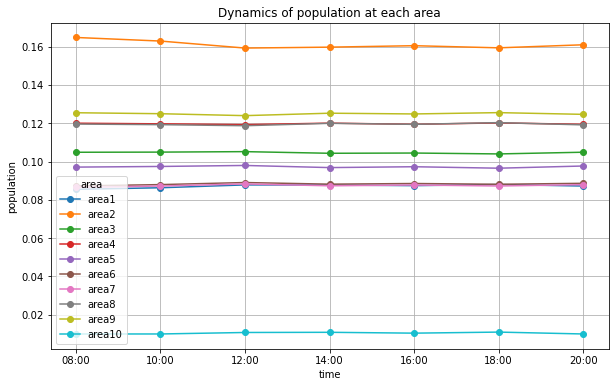

In [36]:
import matplotlib.pyplot as plt

# 各リストのデータ
data = {
    "08:00": [0.08549127, 0.16476024, 0.10484386, 0.12001684, 0.09709397, 0.08727016, 0.08648914, 0.11956492, 0.12547088, 0.01],
    "10:00": [0.08631904, 0.16288463, 0.10491986, 0.11967535, 0.09743588, 0.08796182, 0.08722315, 0.11925113, 0.12496174, 0.01],
    "12:00": [0.08780486, 0.15922886, 0.1051694, 0.11926805, 0.09795775, 0.08904244, 0.08831887, 0.11869876, 0.12395846, 0.0107788],
    "14:00": [0.08775936, 0.15970786, 0.10431275, 0.12004698, 0.09684372, 0.08819407, 0.08733232, 0.11995752, 0.12522999, 0.01087071],
    "16:00": [0.08741789, 0.16046469, 0.10444069, 0.11942154, 0.09729365, 0.08853383, 0.08775372, 0.11941333, 0.12483729, 0.01042833],
    "18:00": [0.08800864, 0.15934998, 0.10397452, 0.12017366, 0.09652521, 0.08813321, 0.0872327, 0.12031294, 0.12552709, 0.01098128],
    "20:00": [0.08721564, 0.16094139, 0.10486552, 0.11941333, 0.09767014, 0.08863804, 0.08794214, 0.11913523, 0.1246304, 0.01]
}

# 各地点の滞在人口の時間変化をプロット
num_points = len(next(iter(data.values())))  # データポイントの数

plt.figure(figsize=(10, 6))

for i in range(num_points):
    population_trend = [data[time][i] for time in data]
    plt.plot(data.keys(), population_trend, marker='o', label=f'area{i+1}')

plt.xlabel('time')
plt.ylabel('population')
plt.title('Dynamics of population at each area')
plt.legend(title='area')
plt.grid(True)
plt.show()


{'08:00': [0.26025151, 0.20193782999999998, 0.36505264000000004, 0.08727016, 0.08648914], '10:00': [0.25920367, 0.20235574, 0.36388822, 0.08796182, 0.08722315], '12:00': [0.25781252, 0.20312714999999998, 0.36192527, 0.08904244, 0.08831887], '14:00': [0.25833793, 0.20115646999999998, 0.36523449, 0.08819407, 0.08733232], '16:00': [0.25831091, 0.20173434, 0.36367216, 0.08853383, 0.08775372], '18:00': [0.2583399, 0.20049973, 0.36601369, 0.08813321, 0.0872327], '20:00': [0.25815703, 0.20253566, 0.36317896, 0.08863804, 0.08794214]}


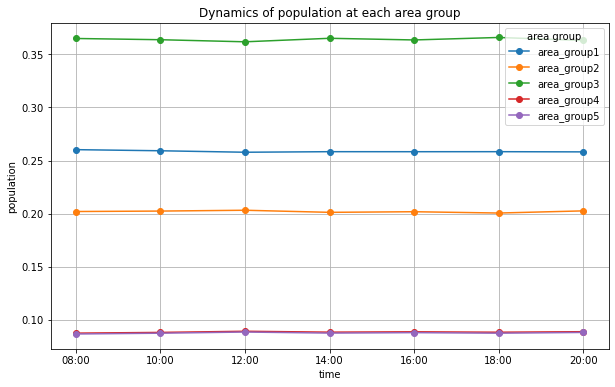

In [37]:


# 各地点を指定された方法でまとめる
aggregated_data = {}
for time, values in data.items():
    aggregated_values = [
        values[0]+ values[1] + values[9],  # i=0, 1, 9の合計
        values[2] + values[4],              # i=2, 4の合計
        values[3] + values[7] + values[8],  # i=3, 7, 8の合計
        values[5],                          # i=5はそのまま
        values[6]                           # i=6はそのまま
        # values[5]
    ]
    aggregated_data[time] = aggregated_values

print(aggregated_data)

# 各地点の滞在人口の時間変化をプロット
plt.figure(figsize=(10, 6))

for i in range(len(aggregated_data["08:00"])):
    population_trend = [aggregated_data[time][i] for time in aggregated_data]
    plt.plot(aggregated_data.keys(), population_trend, marker='o', label=f'area_group{i+1}')

plt.xlabel('time')
plt.ylabel('population')
plt.title('Dynamics of population at each area group')
plt.legend(title='area group')
plt.grid(True)
plt.show()


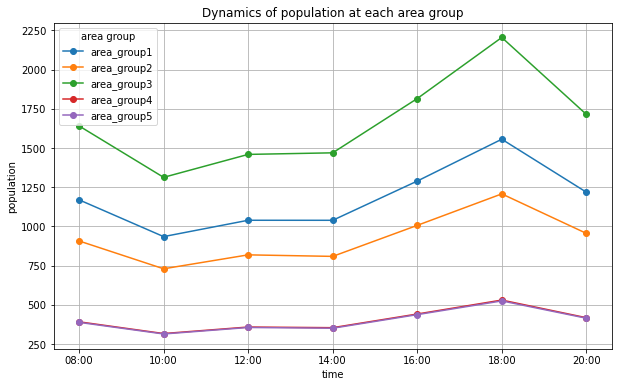

In [39]:
# 各時刻の滞在総人口
total_population = {
    "08:00": 4494.25,
    "10:00": 3608.0,
    "12:00": 4031.5,
    "14:00": 4022.5,
    "16:00": 4990.75,
    "18:00": 6022.5,
    "20:00": 4719.755
}

# 各地点を指定された方法でまとめて滞在人数を計算
aggregated_population = {}
for time, values in data.items():
    total_pop = total_population[time]
    aggregated_values = [
        total_pop * (values[0]+ values[1] + values[9]),  # i=0, 1, 9の合計
        total_pop * (values[2] + values[4]),              # i=2, 4の合計
        total_pop * (values[3] + values[7] + values[8]),  # i=3, 7, 8の合計
        total_pop * values[5],                          # i=5はそのまま
        total_pop * values[6]                           # i=6はそのまま
        # values[5]
    ]
    aggregated_population[time] = aggregated_values

# 各地点の滞在人口の時間変化をプロット
plt.figure(figsize=(10, 6))

for i in range(len(aggregated_population["08:00"])):
    population_trend = [aggregated_population[time][i] for time in aggregated_population]
    plt.plot(aggregated_population.keys(), population_trend, marker='o', label=f'area_group{i+1}')

plt.xlabel('time')
plt.ylabel('population')
plt.title('Dynamics of population at each area group')
plt.legend(title='area group')
plt.grid(True)
plt.show()


In [ ]:
# 各時間における全地域の合計人口を計算
total_pops = []
for i in range(len(hour_lists)):
    total_pop = sum(pop_dict[area][i] for area in area_lists)
    total_pops.append(total_pop)

print(total_pops)

# 各地域ごとの割合を格納する辞書の初期化
pop_percentage_dict = {area: [] for area in area_lists}

# 各地域ごとの割合を計算
for area in area_lists:
    for i in range(len(hour_lists)):
        if total_pops[i] > 0:
            percentage = pop_dict[area][i] / total_pops[i]
        else:
            percentage = 0
        pop_percentage_dict[area].append(percentage)

# 各エリアごとに割合を折れ線グラフで描画
for area in area_lists:
    plt.plot(hour_lists, pop_percentage_dict[area], label=f'Area {area}')

plt.xlabel('Hour')
plt.ylabel('Population Percentage')
plt.title('Temporal Population Dynamics on July 1st, 2019 (Monday)')
plt.legend()
plt.grid(True)
plt.show()


配分計算用

In [41]:
# 比率
lists = {
    "list08": [0.04142731, 0.07869702, 0.05174954, 0.05726891, 0.04794587,
               0.04279367, 0.04255319, 0.05637842, 0.05914881, 0.01,
               0.04250802, 0.08713783, 0.05455897, 0.06142193, 0.05005752,
               0.04402572, 0.043742, 0.06053532, 0.0638389, 0.01],
    "list10": [0.04186114, 0.07765463, 0.05179178, 0.05706342, 0.04812975,
               0.04316607, 0.04293878, 0.05619508, 0.05885316, 0.01,
               0.04284583, 0.08633825, 0.05460647, 0.06124915, 0.05021244,
               0.04431864, 0.04404948, 0.06036553, 0.06358339, 0.01],
    "list12": [0.04218346, 0.07565665, 0.05137406, 0.05639444, 0.04794831,
               0.04334254, 0.04312765, 0.05560757, 0.05809189, 0.01,
               0.04412716, 0.08471843, 0.05496286, 0.06131856, 0.05085452,
               0.0453916, 0.04513906, 0.06055315, 0.06355193, 0.01],
    "list14": [0.04239987, 0.07595451, 0.05105845, 0.0568757, 0.04762034,
               0.04322173, 0.0429563, 0.05642593, 0.05891147, 0.01,
               0.04395177, 0.08461511, 0.05412886, 0.06144964, 0.05001624,
               0.04481406, 0.04449766, 0.06111964, 0.06412398, 0.01],
    "list16": [0.041776, 0.07586317, 0.05097186, 0.05632515, 0.04748561,
               0.04286235, 0.04262575, 0.05563098, 0.05816034, 0.01,
               0.04404223, 0.08569191, 0.0549327, 0.06177946, 0.05072481,
               0.04521108, 0.04492829, 0.06115238, 0.06422992, 0.01],
    "list18": [0.03008806, 0.05197809, 0.03967106, 0.04808681, 0.03500388,
               0.03046799, 0.03017236, 0.04641616, 0.05037309, 0.01110681,
               0.04357311, 0.11963963, 0.06814068, 0.077505, 0.05722839,
               0.04447832, 0.04309495, 0.07848986, 0.08321184, 0.01103872],
    "list20": [0.04109673, 0.07560532, 0.0506527, 0.05572212, 0.04712852,
               0.04234964, 0.0421435, 0.05487456, 0.057437, 0.01,
               0.04437832, 0.08672811, 0.05573753, 0.06232585, 0.05145598,
               0.04573409, 0.04548758, 0.06151876, 0.06464449, 0.01]
}

# 各時刻の滞在総人口
total_population = {
    "08:00": 4494.25,
    "10:00": 3608.0,
    "12:00": 4031.5,
    "14:00": 4022.5,
    "16:00": 4990.75,
    "18:00": 6022.5,
    "20:00": 4719.755
}

# 各時刻の各ODの人数
new_dict = {}

# Calculate the actual numbers based on the ratios and total population
new_dict = {}
for time, population in total_population.items():
    list_key = "list" + time.split(":")[0]
    ratios = lists[list_key]
    actual_numbers = [ratio * population for ratio in ratios]
    new_dict[time] = actual_numbers

print(new_dict)

# Convert the new_dict to a DataFrame for better visualization
import pandas as pd
df = pd.DataFrame(new_dict)


df.to_csv('/Users/takahiromatsunaga/res2023/NPem/assign_res.csv')

{'08:00': [186.1846879675, 353.68408213500004, 232.575370145, 257.3807987675, 215.4807262475, 192.3254513975, 191.2446741575, 253.37871408499998, 265.8295393425, 44.9425, 191.041668885, 391.6191924775, 245.2016509225, 276.0455089025, 224.97100926000002, 197.86259210999998, 196.58748350000002, 272.06086190999997, 286.907976325, 44.9425], '10:00': [151.03499312, 280.17790504, 186.86474224, 205.88481936, 173.652138, 155.74318056, 154.92311824, 202.75184864, 212.34220128, 36.08, 154.58775464, 311.50840600000004, 197.02014376, 220.9869332, 181.16648351999999, 159.90165312, 158.93052384, 217.79883224, 229.40887112000001, 36.08], '12:00': [170.06261899, 305.009784475, 207.11452289, 227.35418485999998, 193.303611765, 174.73545001, 173.869120975, 224.18191845500002, 234.197454535, 40.315, 177.89864554, 341.542350545, 221.58277009, 247.20577464000002, 205.01999738, 182.9962354, 181.97812039000002, 244.120024225, 256.209605795, 40.315], '14:00': [170.553477075, 305.52701647500004, 205.382615125, 

In [42]:
df.T 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
08:00,186.184688,353.684082,232.575370,257.380799,215.480726,192.325451,191.244674,253.378714,265.829539,44.942500,191.041669,391.619192,245.201651,276.045509,224.971009,197.862592,196.587484,272.060862,286.907976,44.942500
10:00,151.034993,280.177905,186.864742,205.884819,173.652138,155.743181,154.923118,202.751849,212.342201,36.080000,154.587755,311.508406,197.020144,220.986933,181.166484,159.901653,158.930524,217.798832,229.408871,36.080000
12:00,170.062619,305.009784,207.114523,227.354185,193.303612,174.735450,173.869121,224.181918,234.197455,40.315000,177.898646,341.542351,221.582770,247.205775,205.019997,182.996235,181.978120,244.120024,256.209606,40.315000
14:00,170.553477,305.527016,205.382615,228.782503,191.552818,173.859409,172.791717,226.973303,236.971388,40.225000,176.795995,340.364280,217.733339,247.181177,201.190325,180.264556,178.991837,245.853752,257.938710,40.225000
16:00,208.493572,378.614116,254.387810,281.104742,236.988808,213.915273,212.734462,277.640313,290.263717,49.907500,219.803759,427.666900,274.155373,308.325840,253.154846,225.637198,224.225863,305.196240,320.555473,49.907500
18:00,181.205341,313.038047,238.918959,289.602813,210.810867,183.493470,181.713038,279.541324,303.371935,66.890763,262.419055,720.529672,410.377245,466.773863,344.657979,267.870682,259.539336,472.705182,501.143306,66.480691
20:00,193.966497,356.838587,239.068334,262.994754,222.435068,199.879925,198.906995,258.994479,271.088568,47.197550,209.454798,409.335431,263.067486,294.162742,242.859619,215.853700,214.690233,290.353475,305.106155,47.197550
